# Install

In [ ]:
!pip install jupyter-dash -q

In [ ]:
!pip install dash-cytoscape -q

In [ ]:
!pip install opendatasets

In [ ]:
!pip install category_encoders

# Import

In [ ]:
# Utils
import random
import warnings
import numpy as np
import pandas as pd
import opendatasets as od
import missingno as msno
import os
from category_encoders import BinaryEncoder

# Plot
import dash
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

warnings.simplefilter(action='ignore', category=FutureWarning)

<ipython-input-9-766eb355b2fb>:18: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-9-766eb355b2fb>:19: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Download

In [ ]:
# Download data
path = 'https://www.kaggle.com/datasets/vanviethieuanh/vietnam-weather-data?fbclid=IwAR0I9LPl9GcBESRcLgMkufchT0TD_0pf8vlPzk-qRxcNdvVFUrGeTj28CIM'
od.download(path)

# Read csv file
path = '/content/vietnam-weather-data/weather.csv'
df = pd.read_csv(path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hauth7201
Your Kaggle Key: ··········


100%|██████████| 1.88M/1.88M [00:00<00:00, 2.46MB/s]


In [ ]:
# Number of samples
number_of_row = len(df)
print('Number of row:', number_of_row)

Number of row: 181960


# Noising data

In [ ]:
# Convert data to date

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['province', 'date'], ignore_index=True)

df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,28,22,15,ENE,0.5,85,61,1010,2009-01-02
2,Bac Lieu,23,21,9,ESE,16.7,91,77,1011,2009-01-03
3,Bac Lieu,27,21,9,E,2.2,86,32,1011,2009-01-04
4,Bac Lieu,29,22,10,SE,0.0,81,25,1010,2009-01-05


In [ ]:
def noising_data(df, column, frac, value):
  amount = int(number_of_row*frac)

  # index list of sample
  indices = np.random.choice(range(number_of_row), size=amount, replace=False)

  # Change value
  df.loc[indices, column] = value

> ## Add noise to feature

In [ ]:
noising_data(df, 'wind_d', 0.1, None)

In [ ]:
noising_data(df, 'max', 0.01, None)

In [ ]:
noising_data(df, 'humidi', 0.05, None)

In [ ]:
df

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27.0,22,17,None,6.9,90.0,71,1010,2009-01-01
1,Bac Lieu,28.0,22,15,ENE,0.5,85.0,61,1010,2009-01-02
2,Bac Lieu,23.0,21,9,ESE,16.7,91.0,77,1011,2009-01-03
3,Bac Lieu,27.0,21,9,E,2.2,86.0,32,1011,2009-01-04
4,Bac Lieu,29.0,22,10,SE,0.0,81.0,25,1010,2009-01-05
...,...,...,...,...,...,...,...,...,...,...
181955,Yen Bai,32.0,23,6,ESE,7.3,79.0,71,1001,2021-06-14
181956,Yen Bai,34.0,25,6,SSE,0.3,71.0,46,999,2021-06-15
181957,Yen Bai,36.0,27,6,SW,0.0,64.0,29,1000,2021-06-16
181958,Yen Bai,37.0,28,7,S,0.0,66.0,27,1002,2021-06-17


# Statistic

In [ ]:
numerical_feature = ['max', 'min', 'wind', 'rain', 'humidi', 'cloud', 'pressure']
nominal_feature = ['province', 'wind_d']
time_series_feature = ['date']

In [ ]:
provinces = df['province'].unique()
print('Number of provinces:', len(provinces))
print('\nData:\n', provinces)

Number of provinces: 40

Data:
 ['Bac Lieu' 'Ben Tre' 'Bien Hoa' 'Buon Me Thuot' 'Ca Mau' 'Cam Pha'
 'Cam Ranh' 'Can Tho' 'Chau Doc' 'Da Lat' 'Ha Noi' 'Hai Duong' 'Hai Phong'
 'Hanoi' 'Ho Chi Minh City' 'Hoa Binh' 'Hong Gai' 'Hue' 'Long Xuyen'
 'My Tho' 'Nam Dinh' 'Nha Trang' 'Phan Rang' 'Phan Thiet' 'Play Cu'
 'Qui Nhon' 'Rach Gia' 'Soc Trang' 'Tam Ky' 'Tan An' 'Thai Nguyen'
 'Thanh Hoa' 'Tra Vinh' 'Tuy Hoa' 'Uong Bi' 'Viet Tri' 'Vinh' 'Vinh Long'
 'Vung Tau' 'Yen Bai']


In [ ]:
wind_d = df['wind_d'].unique()
print('Number of wind direction:', len(wind_d))
print('\nData:\n', wind_d)

Number of wind direction: 17

Data:
 [None 'ENE' 'ESE' 'E' 'SE' 'NE' 'S' 'SSW' 'SSE' 'SW' 'WSW' 'W' 'WNW' 'NW'
 'NNE' 'NNW' 'N']


In [ ]:
df.describe()

,max,min,wind,rain,humidi,cloud,pressure
count,180141.000000,181960.000000,181960.000000,181960.000000,172862.000000,181960.000000,181960.000000
mean,29.839392,23.277874,11.038657,6.567130,77.077258,41.721268,1010.229127
std,4.570556,3.945381,5.311807,13.602055,9.286889,23.875067,4.635714
min,4.000000,2.000000,1.000000,0.000000,23.000000,0.000000,988.000000
25%,28.000000,21.000000,7.000000,0.100000,71.000000,23.000000,1008.000000
50%,31.000000,24.000000,10.000000,1.800000,78.000000,38.000000,1010.000000
75%,33.000000,26.000000,14.000000,7.500000,83.000000,58.000000,1012.000000
max,46.000000,32.000000,54.000000,596.400000,100.000000,100.000000,1038.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   province  181960 non-null  object        
 1   max       180141 non-null  float64       
 2   min       181960 non-null  int64         
 3   wind      181960 non-null  int64         
 4   wind_d    163764 non-null  object        
 5   rain      181960 non-null  float64       
 6   humidi    172862 non-null  float64       
 7   cloud     181960 non-null  int64         
 8   pressure  181960 non-null  int64         
 9   date      181960 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 13.9+ MB


<Axes: >

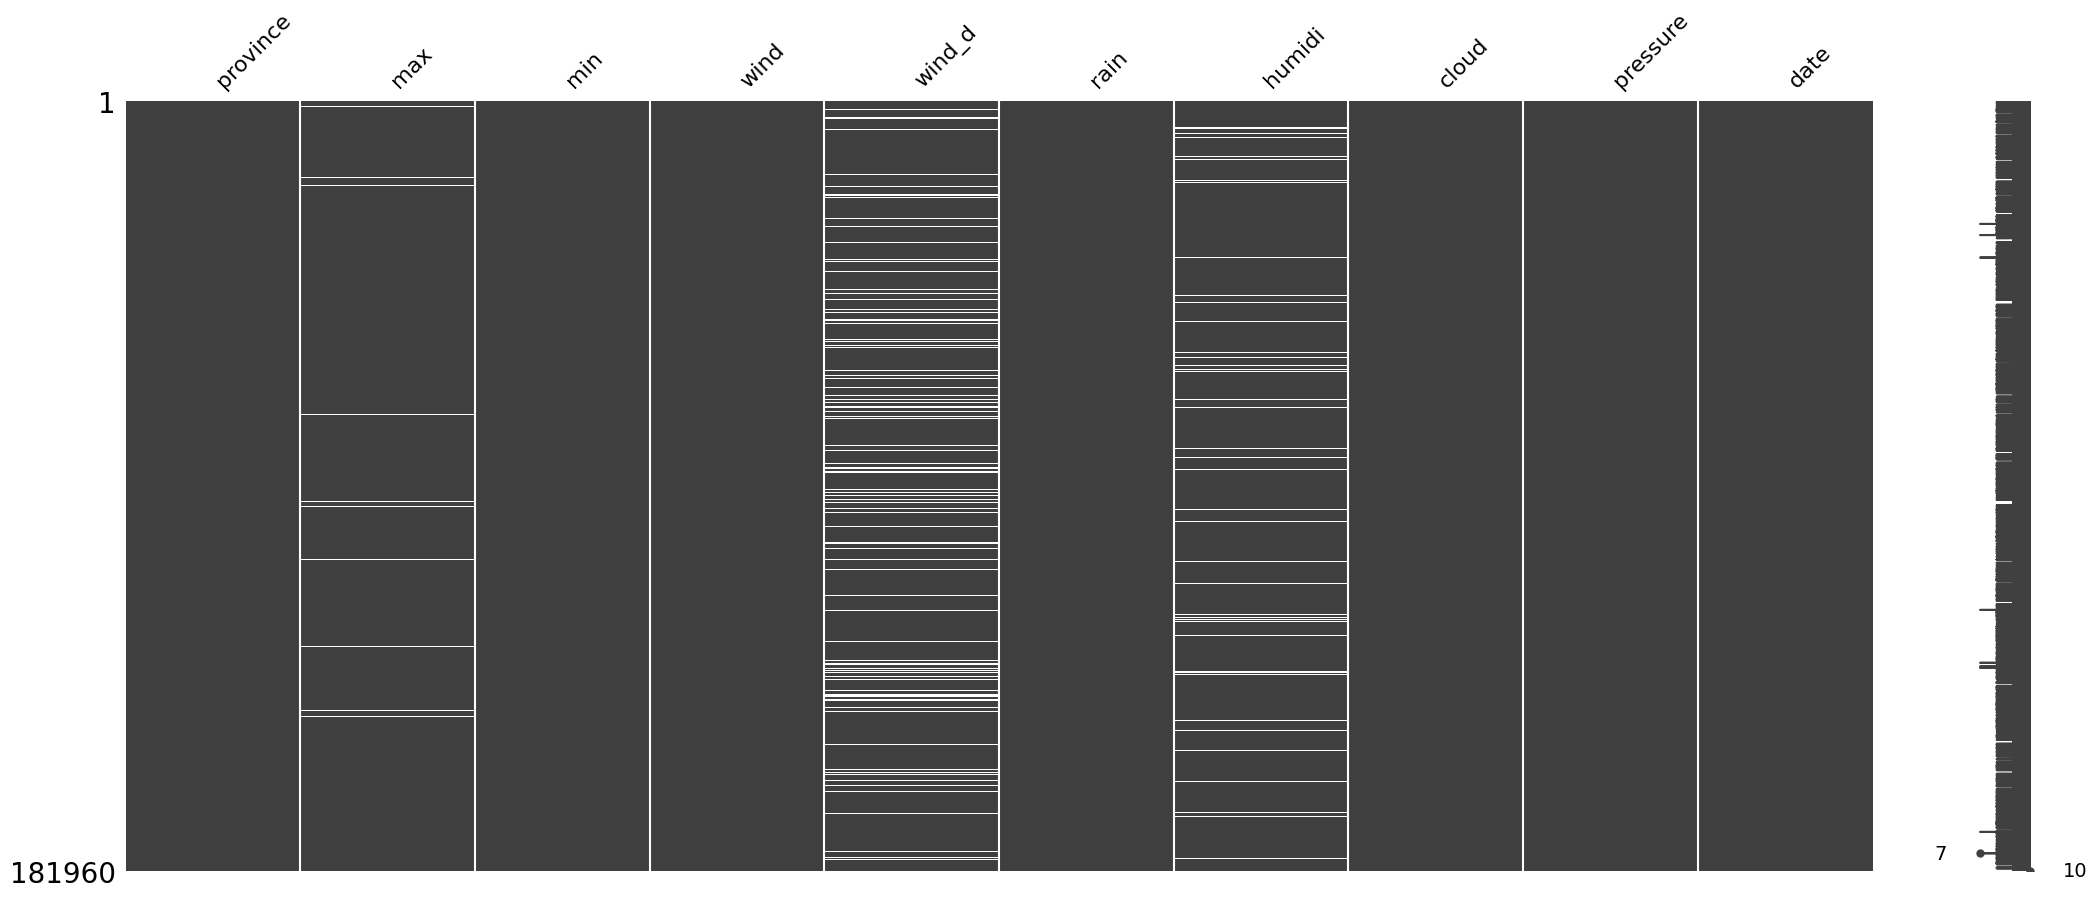

In [ ]:
# Check null/missing valaue
msno.matrix(df)

In [ ]:
# Save nosing data
path = "nosing_data.csv"
df.to_csv(path)

# Visualize

In [ ]:
def create_logical_array(size, index):
    logical_array = np.full(size, False)

    logical_array[index] = True

    return logical_array.tolist()

> ## Nominal feature

In [ ]:
# win_d histogram plot

fig = go.Figure()

num_province = len(provinces)

button_list = list([
    dict(label = 'All',
         method = 'update',
         args = [{'visible': [True]*num_province},
          {'showlegend':True}])
    ])

for i in range(num_province):
    fig.add_trace(
        go.Histogram(x=df[df['province']==provinces[i]]['wind_d'],
                     name=provinces[i])
    )

    button_list.append(
        dict(label = provinces[i],
             method = 'update',
             args = [{'visible': create_logical_array(num_province, i)},
              {'showlegend':True}])
    )

fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=button_list
        )
    ])

fig.show()

In [ ]:
# wind_d count

df_wind = df.groupby('province')['wind_d'].value_counts().unstack()

> ## Numerical feature

In [ ]:
# Scatter plot province with other feature

# Tạo DataFrame mẫu
features = ['province', 'max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud', 'pressure', 'date']
plot_df = df[features]

# Khởi tạo ứng dụng Dash
app = JupyterDash(__name__)

# Tạo layout cho ứng dụng Dash
app.layout = html.Div(
    children = [
        dcc.Graph(id='graph'),
        html.Div(children=[
            dcc.Dropdown(
                id='province-dropdown',
                options=[{'label': province, 'value': province} for province in provinces],
                value=plot_df['province'][0],
                style={
                      'width': '200px',
                      'margin-right': '10px',
                      'position': 'absolute',
                      'top': '10px',
                      'left': '50px'},
                placeholder='Select province'
            ),
            dcc.Dropdown(
                id='feature-dropdown',
                options=[{'label': feature, 'value': feature} for feature in plot_df.columns if feature not in ['province', 'date']],
                value='max',
                style={
                      'width': '200px',
                      'margin-right': '10px',
                      'position': 'absolute',
                      'top': '10px',
                      'left': '200px'},
                placeholder='Select feature'
            )]
        )
    ]
)

# Định nghĩa callback để cập nhật đồ thị dựa trên giá trị của hai dropdown menu
@app.callback(
    Output('graph', 'figure'),
    [Input('province-dropdown', 'value'), Input('feature-dropdown', 'value')]
)
def update_graph(province, feature):
    filtered_df = df[df['province'] == province]
    fig = px.scatter(filtered_df, x='date', y=feature, color='province')
    return fig

app.run_server(mode='inline')


In [ ]:
# Scatter matrix plot

g = sns.PairGrid(df.sample(frac=0.3))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [ ]:
# box plot

fig = go.Figure()

num_feature = len(numerical_feature)

button_list = list([])

for i in range(num_feature):
  fig.add_trace(
      go.Box(x = df['province'],
             y=df[numerical_feature[i]],
             name = numerical_feature[i])
      )

  button_list.append(
      dict(label = numerical_feature[i],
           method = 'update',
           args = [{'visible': create_logical_array(num_feature, i)}]
           )
      )

fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=button_list,
        y=1
        )
    ])

fig.show()

In [ ]:
# outliers count

Q1 = df[numerical_feature].quantile(0.25)
Q3 = df[numerical_feature].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
df_outliers = df[['province']+numerical_feature]

grouped = df_outliers.groupby('province')

outliers_count = grouped.apply(lambda x: ((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).sum()).drop('province', axis=1)

In [ ]:
#@title Total outlier of features


print("Total outliers:\n")
print('Total:', sum(outliers_count.sum()))
print()

feature_outlier_number = outliers_count.sum()
outliers_value_df = pd.DataFrame({'column name': feature_outlier_number.index,
                                 'number of outlier': feature_outlier_number.values,
                                 'percent of outlier': feature_outlier_number.values * 100 / len(df)})

outliers_value_df['percent of outlier'] = outliers_value_df['percent of outlier'].round(decimals=2)
outliers_value_df

Total outliers:

Total: 51532



,column name,number of outlier,percent of outlier
0,cloud,0,0.00
1,humidi,1943,1.07
2,max,8477,4.66
3,min,5200,2.86
4,pressure,14552,8.00
5,rain,17147,9.42
6,wind,4213,2.32


> ## Correlation

In [ ]:
plt.figure(figsize=(16, 8))
corr = df.corr()
sns.heatmap(corr, annot=True)

# Preprocessing

> ## Missing value

<Axes: >

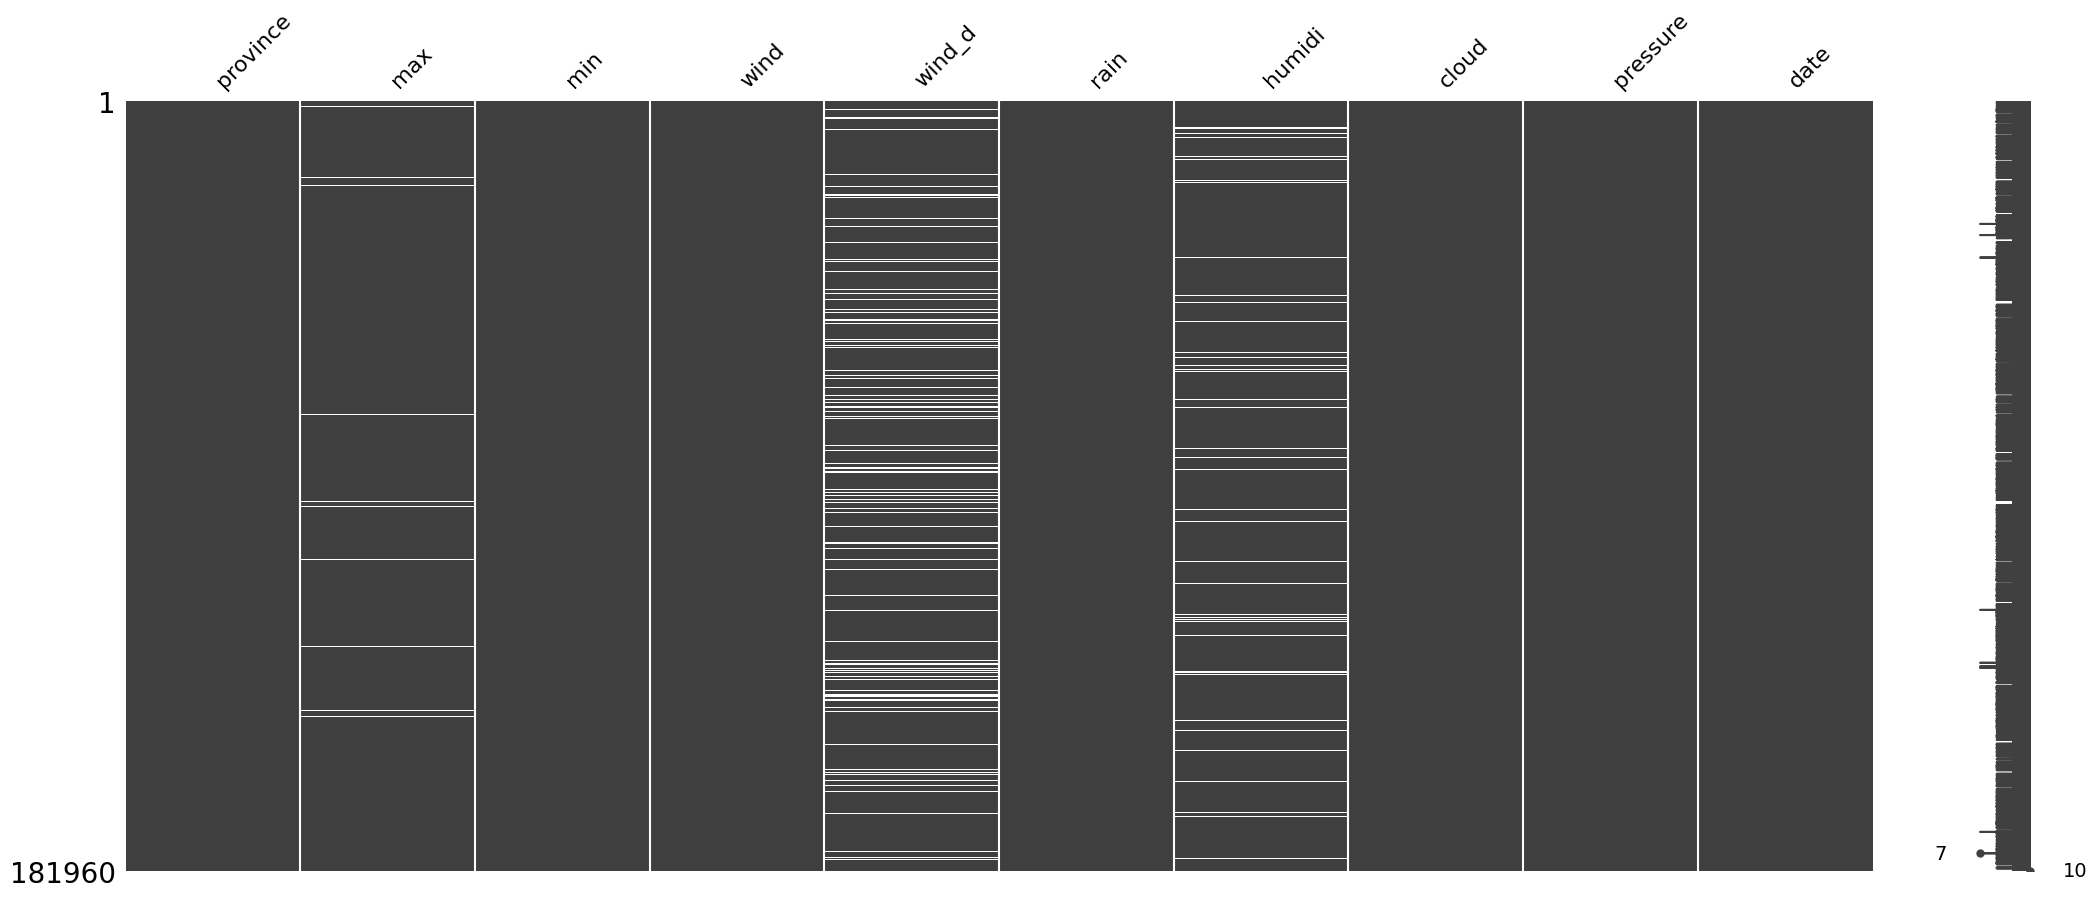

In [ ]:
# Check missing value

msno.matrix(df)

In [ ]:
missing_feature = ['max', 'wind_d', 'humidi']

> ## Missing probability

In [ ]:
# Missing probability

percent_missing = df[missing_feature].isnull().sum()
missing_value_df = pd.DataFrame({'column name': missing_feature,
                                 'number of null': percent_missing,
                                 'percent of missing': percent_missing * 100 / len(df)})

missing_value_df['percent of missing'] = missing_value_df['percent of missing'].round(decimals=2)
missing_value_df

,column name,number of null,percent of missing
max,max,1819,1.0
wind_d,wind_d,18196,10.0
humidi,humidi,9098,5.0


> ## Fill missing value

In [ ]:
# Fill max feature
df['max'] = df['max'].bfill()

# Fill wind_d feature
df['wind_d'] = df['wind_d'].bfill()

# Fill humidi feature
df['humidi'] = df['humidi'].interpolate()

> ## Categorical encoding

In [ ]:
encoded_df = df.copy()

In [ ]:
# Binary encode province feature
encoded_df['copy_province'] = encoded_df['province']
province_encoder = BinaryEncoder(cols=['copy_province'])
encoded_df = province_encoder.fit_transform(encoded_df)

In [ ]:
binary_province_feature = ['copy_province_0', 'copy_province_1', 'copy_province_2', 'copy_province_3', 'copy_province_4', 'copy_province_5']
encoded_df[binary_province_feature] = encoded_df[binary_province_feature].astype('int8')

> ## Outlier data

In [ ]:
def cap_and_floor_outliers_iqr(df, columns, k=1.5):
    # Capping and flooring outliers
    in_outlier=list()
    for column in columns:
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1

      lower_bound = Q1 - k * IQR
      upper_bound = Q3 + k * IQR

      count= len(df[(df[column] > lower_bound) & (df[column]< upper_bound)])
      in_outlier.append(count)

      df[column] = df[column].clip(lower_bound, upper_bound)

    return df, in_outlier

In [ ]:
encoded_df, _ = cap_and_floor_outliers_iqr(encoded_df, ['max', 'min', 'pressure', 'humidi', 'cloud', 'wind'])

> ## Scaling data


In [ ]:
# Select feature

provinces = ['province', 'copy_province_0', 'copy_province_1','copy_province_2', 'copy_province_3', 'copy_province_4','copy_province_5']
normalize_feature = ['max', 'min', 'rain', 'pressure', 'humidi', 'cloud', 'wind']
num_feature = len(normalize_feature)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min max scale
scaled_columns = ['_'.join(['scaled', column]) for column in normalize_feature]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(encoded_df[normalize_feature])
encoded_df[scaled_columns] = pd.DataFrame(scaled_data, columns=scaled_columns)

# Modeling

> ## Import

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

> ## GRU

>> #### Data selecting

In [ ]:
selected_df = encoded_df[provinces+scaled_columns]

selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   province         181960 non-null  object 
 1   copy_province_0  181960 non-null  int8   
 2   copy_province_1  181960 non-null  int8   
 3   copy_province_2  181960 non-null  int8   
 4   copy_province_3  181960 non-null  int8   
 5   copy_province_4  181960 non-null  int8   
 6   copy_province_5  181960 non-null  int8   
 7   scaled_max       181960 non-null  float64
 8   scaled_min       181960 non-null  float64
 9   scaled_rain      181960 non-null  float64
 10  scaled_pressure  181960 non-null  float64
 11  scaled_humidi    181960 non-null  float64
 12  scaled_cloud     181960 non-null  float64
 13  scaled_wind      181960 non-null  float64
dtypes: float64(7), int8(6), object(1)
memory usage: 12.1+ MB


>> #### Create dataset

In [ ]:
from tqdm import tqdm

def create_dataset(data, past, step, target, distin_feature, fureture_length=1, ratio=None, mode=None):

  target_data = data[target]

  if mode != None:
    X_val = []
    Y_val = []

    for obj in data[distin_feature].unique():
      x_val = data
      y_val = target_data

      print(f"\n\n\nProvince {obj}")
      print('Validation data')
      for i in tqdm(range(len(x_val)-(past+fureture_length))):
        X_val.append(x_val.drop(distin_feature, axis=1).values[range(i, i+past, step)].tolist())
        Y_val.append(y_val.drop(distin_feature, axis=1).values[(i+past):(i+past+fureture_length)].flatten().tolist())

    return X_val, Y_val

  else:
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []

    for obj in data[distin_feature].unique():
      provine_data = data[data[distin_feature]==obj]
      target_feature = target_data[target_data[distin_feature]==obj]
      split = int(len(provine_data)*ratio)

      x_train = provine_data[:split]
      x_val = provine_data[split:]

      y_train = target_feature[:split]
      y_val = target_feature[split:]

      print(f"\n\n\nProvince {obj}")
      print(f'Training data')
      for i in tqdm(range(len(x_train)-(past+fureture_length))):
        X_train.append(x_train.drop(distin_feature, axis=1).values[range(i, i+past, step)].tolist())
        Y_train.append(y_train.drop(distin_feature, axis=1).values[(i+past):(i+past+fureture_length)].flatten().tolist())


      print('Validation data')
      for i in tqdm(range(len(x_val)-(past+fureture_length))):
        X_val.append(x_val.drop(distin_feature, axis=1).values[range(i, i+past, step)].tolist())
        Y_val.append(y_val.drop(distin_feature, axis=1).values[(i+past):(i+past+fureture_length)].flatten().tolist())

  return np.array(X_train), np.array(Y_train), np.array(X_val), np.array(Y_val)

In [ ]:
# Parameters

past = 60 # Number of days in the past used to predict
step = 1 # Distance between days
distin_feature = 'province'
target = scaled_columns + ['province']
df_length = len(selected_df)
future_length = 5
ratio = 0.8

In [ ]:
target

['scaled_max',
 'scaled_min',
 'scaled_rain',
 'scaled_pressure',
 'scaled_humidi',
 'scaled_cloud',
 'scaled_wind',
 'province']

In [ ]:
X_train, Y_train, X_val, Y_val = create_dataset(selected_df, past, step, target, distin_feature, future_length, ratio)




Province Bac Lieu
Training data


100%|██████████| 3574/3574 [00:04<00:00, 757.38it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 931.22it/s]





Province Ben Tre
Training data


100%|██████████| 3574/3574 [00:04<00:00, 842.06it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 972.95it/s]





Province Bien Hoa
Training data


100%|██████████| 3574/3574 [00:05<00:00, 696.42it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 943.67it/s]





Province Buon Me Thuot
Training data


100%|██████████| 3574/3574 [00:05<00:00, 701.03it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 860.35it/s]





Province Ca Mau
Training data


100%|██████████| 3574/3574 [00:05<00:00, 689.85it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 883.80it/s]





Province Cam Pha
Training data


100%|██████████| 3574/3574 [00:04<00:00, 805.88it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 903.81it/s]





Province Cam Ranh
Training data


100%|██████████| 3574/3574 [00:03<00:00, 918.43it/s]


Validation data


100%|██████████| 845/845 [00:01<00:00, 741.86it/s]





Province Can Tho
Training data


100%|██████████| 3574/3574 [00:04<00:00, 726.66it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 949.85it/s]





Province Chau Doc
Training data


100%|██████████| 3574/3574 [00:03<00:00, 954.95it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 985.06it/s]





Province Da Lat
Training data


100%|██████████| 3574/3574 [00:04<00:00, 794.94it/s]


Validation data


100%|██████████| 845/845 [00:01<00:00, 481.26it/s]





Province Ha Noi
Training data


100%|██████████| 3574/3574 [00:03<00:00, 940.14it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 993.59it/s]





Province Hai Duong
Training data


100%|██████████| 3574/3574 [00:04<00:00, 811.67it/s]


Validation data


100%|██████████| 845/845 [00:01<00:00, 825.23it/s]





Province Hai Phong
Training data


100%|██████████| 3574/3574 [00:03<00:00, 948.75it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 887.33it/s]





Province Hanoi
Training data


100%|██████████| 3574/3574 [00:05<00:00, 709.69it/s]


Validation data


100%|██████████| 845/845 [00:01<00:00, 725.01it/s]





Province Ho Chi Minh City
Training data


100%|██████████| 3574/3574 [00:03<00:00, 895.66it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 960.45it/s]





Province Hoa Binh
Training data


100%|██████████| 3574/3574 [00:03<00:00, 960.83it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 964.13it/s]





Province Hong Gai
Training data


100%|██████████| 3574/3574 [00:04<00:00, 783.94it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 961.62it/s]





Province Hue
Training data


100%|██████████| 3574/3574 [00:05<00:00, 694.16it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 942.87it/s]





Province Long Xuyen
Training data


100%|██████████| 3574/3574 [00:04<00:00, 819.64it/s]


Validation data


100%|██████████| 845/845 [00:01<00:00, 839.43it/s]





Province My Tho
Training data


100%|██████████| 3574/3574 [00:03<00:00, 960.79it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 949.00it/s]





Province Nam Dinh
Training data


100%|██████████| 3574/3574 [00:07<00:00, 510.51it/s]


Validation data


100%|██████████| 845/845 [00:02<00:00, 416.60it/s]





Province Nha Trang
Training data


100%|██████████| 3574/3574 [00:08<00:00, 440.37it/s]


Validation data


100%|██████████| 845/845 [00:02<00:00, 351.35it/s]





Province Phan Rang
Training data


100%|██████████| 3574/3574 [00:06<00:00, 570.45it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 970.38it/s] 





Province Phan Thiet
Training data


100%|██████████| 3574/3574 [00:03<00:00, 957.61it/s]


Validation data


100%|██████████| 845/845 [00:01<00:00, 805.59it/s]





Province Play Cu
Training data


100%|██████████| 3574/3574 [00:04<00:00, 832.58it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 919.43it/s]





Province Qui Nhon
Training data


100%|██████████| 3574/3574 [00:03<00:00, 956.51it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 940.41it/s]





Province Rach Gia
Training data


100%|██████████| 3574/3574 [00:04<00:00, 796.50it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 946.40it/s]





Province Soc Trang
Training data


100%|██████████| 3574/3574 [00:03<00:00, 928.60it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 921.19it/s]





Province Tam Ky
Training data


100%|██████████| 3574/3574 [00:06<00:00, 587.19it/s]


Validation data


100%|██████████| 845/845 [00:01<00:00, 832.13it/s]





Province Tan An
Training data


100%|██████████| 3574/3574 [00:03<00:00, 954.62it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 975.98it/s]





Province Thai Nguyen
Training data


100%|██████████| 3574/3574 [00:03<00:00, 936.20it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 904.64it/s]





Province Thanh Hoa
Training data


100%|██████████| 3574/3574 [00:04<00:00, 777.07it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 953.74it/s]





Province Tra Vinh
Training data


100%|██████████| 3574/3574 [00:03<00:00, 956.65it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 916.47it/s]





Province Tuy Hoa
Training data


100%|██████████| 3574/3574 [00:04<00:00, 784.85it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 871.73it/s]





Province Uong Bi
Training data


100%|██████████| 3574/3574 [00:03<00:00, 956.58it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 934.26it/s]





Province Viet Tri
Training data


100%|██████████| 3574/3574 [00:03<00:00, 952.10it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 934.00it/s]





Province Vinh
Training data


100%|██████████| 3574/3574 [00:06<00:00, 513.38it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 931.37it/s]





Province Vinh Long
Training data


100%|██████████| 3574/3574 [00:05<00:00, 689.95it/s]


Validation data


100%|██████████| 845/845 [00:01<00:00, 726.78it/s]





Province Vung Tau
Training data


100%|██████████| 3574/3574 [00:04<00:00, 872.92it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 929.84it/s]





Province Yen Bai
Training data


100%|██████████| 3574/3574 [00:03<00:00, 947.41it/s]


Validation data


100%|██████████| 845/845 [00:00<00:00, 942.39it/s]


>> #### Training

In [ ]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [ ]:
input_shape = past, len(selected_df.columns)-1
output_shape = future_length*(len(target)-1)

model = Sequential()
model.add(GRU(300, return_sequences= True, input_shape= input_shape))
model.add(GRU(200, return_sequences= True))
model.add(GRU(200, return_sequences= True))
model.add(GRU(200))
model.add(Dense(output_shape))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
from keras.utils import vis_utils
vis_utils.plot_model(model, to_file='rnn_model.png', show_shapes=True)

In [ ]:
file_path = '/content/model.h5'
overlap = False
history = []

if os.path.exists(file_path) and overlap==False:
    model = tf.keras.models.load_model(file_path)
else:
    batch_size = 512
    epochs = 100
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1, callbacks=[early_stopping])

    model.save('model.h5')

Epoch 1/100
280/280 [==============================] - 42s 104ms/step - loss: 0.0202 - val_loss: 0.0155
Epoch 2/100
280/280 [==============================] - 28s 101ms/step - loss: 0.0152 - val_loss: 0.0154
Epoch 3/100
280/280 [==============================] - 29s 105ms/step - loss: 0.0148 - val_loss: 0.0153
Epoch 4/100
280/280 [==============================] - 31s 110ms/step - loss: 0.0146 - val_loss: 0.0154
Epoch 5/100
280/280 [==============================] - 30s 108ms/step - loss: 0.0143 - val_loss: 0.0155
Epoch 6/100
280/280 [==============================] - 30s 107ms/step - loss: 0.0140 - val_loss: 0.0154


In [ ]:
loss = pd.DataFrame(history.history)

In [ ]:
loss.plot(title="Mean_squared_error")

>> #### Evaluation

In [ ]:
# Get value
province = 'Ha Noi'
days = 365
X, Y = create_dataset(selected_df[selected_df['province']==province][-days:], past, step, target, distin_feature, future_length, mode=True)

predict = model.predict(X).reshape(1, -1)[0]
predict = np.array([predict[i:i+output_shape].reshape((-1, num_feature)) for i in range(0, len(predict), output_shape)])
Y = np.array(Y).reshape((-1, future_length, num_feature))

In [ ]:
def evaluation_plot(true_value, prediction, day_th):
  plt.figure(figsize=(22,22))
  plt.subplots_adjust(wspace=0.4, hspace=0.6)

  for i in range(num_feature):
    plt.subplot(num_feature, 1, i+1)
    plt.plot(df['date'][-days: -(days - len(X))], prediction[target[i]], label='Predict value')
    plt.plot(df['date'][-days: -(days - len(X))], true_value[target[i]], label='True value')
    plt.title((target[i]).upper())
    plt.legend()

  plt.show()

In [ ]:
dayth = 0

prediction = pd.DataFrame(predict[:, dayth, :], columns=[target[:-1]])
true_value = pd.DataFrame(Y[:, dayth, :], columns=[target[:-1]])
evaluation_plot(true_value, prediction, dayth)

In [ ]:
def mean_square_error(A, B):
    mse = np.mean((A - B)**2)
    return mse

losses = []

for day in range(future_length):
  prediction = pd.DataFrame(predict[:, day, :], columns=[target[:-1]])
  true_value = pd.DataFrame(Y[:, day, :], columns=[target[:-1]])
  losses.append(mean_square_error(prediction, true_value))

In [ ]:
# Loss of each day
stacked_df = pd.concat(losses, ignore_index=True, axis=1)
stacked_df = stacked_df.transpose()
stacked_df.index = ['day_1','day_2','day_3','day_4','day_5',]
stacked_df

>> #### Forecast

In [ ]:
#@title Input fields


Province = "Bac Lieu" #@param ["Bac Lieu", "Ben Tre", "Bien Hoa", "Buon Me Thuot", "Ca Mau", "Cam Pha", "Cam Ranh", "Can Tho", "Chau Doc", "Da Lat", "Ha Noi", "Hai Duong", "Hai Phong", "Hanoi", "Ho Chi Minh City", "Hoa Binh", "Hong Gai", "Hue", "Long Xuyen", "My Tho", "Nam Dinh", "Nha Trang", "Phan Rang", "Phan Thiet", "Play Cu", "Qui Nhon", "Rach Gia", "Soc Trang", "Tam Ky", "Tan An", "Thai Nguyen", "Thanh Hoa", "Tra Vinh", "Tuy Hoa", "Uong Bi", "Viet Tri", "Vinh", "Vinh Long", "Vung Tau", "Yen Bai"]
predicted_number_of_days = 1 #@param {type:"integer"}

# Get input data
input = selected_df[selected_df['province']==Province][-past:].drop('province', axis=1).values.tolist().copy()
index = df[selected_df['province']==Province][-past:]

province_encoder = BinaryEncoder(cols=['province'])
province_encoder.fit_transform(df['province'])
encoded_province = province_encoder.transform(pd.DataFrame({'province': [Province]})).values.tolist()[0]

# Predict
for day in range(predicted_number_of_days):
  input.append(encoded_province + model.predict([input[day:(day+past)]])[0].reshape((future_length, num_feature))[dayth].tolist())

result = pd.DataFrame(np.array(input), columns=selected_df.columns[1:])


In [ ]:
plt.figure(figsize=(22, 22))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

past_date = df['date'][-past:]
predict_date = [df['date'].iloc[-1] + pd.Timedelta(days=i) for i in range(predicted_number_of_days+1)]

for i in range(num_feature):
  plt.subplot(num_feature, 1, i+1)
  plt.plot(df['date'][-past:], result.iloc[:past][target[i]], 'o-', label='Dữ liệu')
  plt.plot(predict_date, result.iloc[-(predicted_number_of_days+1):][target[i]], 'o-', color='orange', label='Dự đoán')
  plt.title((target[i]).upper())
  plt.legend()


plt.show()

In [ ]:
rescale_data = np.round(scaler.inverse_transform(result.values[:, -7:]), 2)
predict_df = pd.DataFrame(rescale_data, columns=normalize_feature)
predict_df.index = list(past_date[:-1])+predict_date
predict_df[-predicted_number_of_days:]